# ***Assignment: Ad Image Insertion in Video with Occlusion Handling***

<br>*Name*: **Gulafshan**
<br>
*Subject:* **Assignment: Ad Image Insertion in Video with Occlusion Handling**
<br>
-----------------------------------------------------------------------------

*Objective:* **The goal of this assignment is to develop a computer vision solution that inserts a specified advertisement image into a given video, ensuring graceful handling of occlusions**<br>
<br>

------------------------------------------------------------------------

*Scope:*  **Develop an algorithm aimed at inserting a provided advertisement image into a
video, paying attention to potential occlusions caused by objects or movements in the scene.
Demonstrate a strategic approach to handle occlusions during the insertion process and document it.**<br>
<br>

-----------------------------------------------------------------------
 *Tools And Technology:*  **Utilize computer vision libraries (e.g., OpenCV, TensorFlow,
PyTorch) and any preferred programming language (Python preferred) to outline your
approach. Document the tools and versions used in your development.**<br>
<br>




<hr>

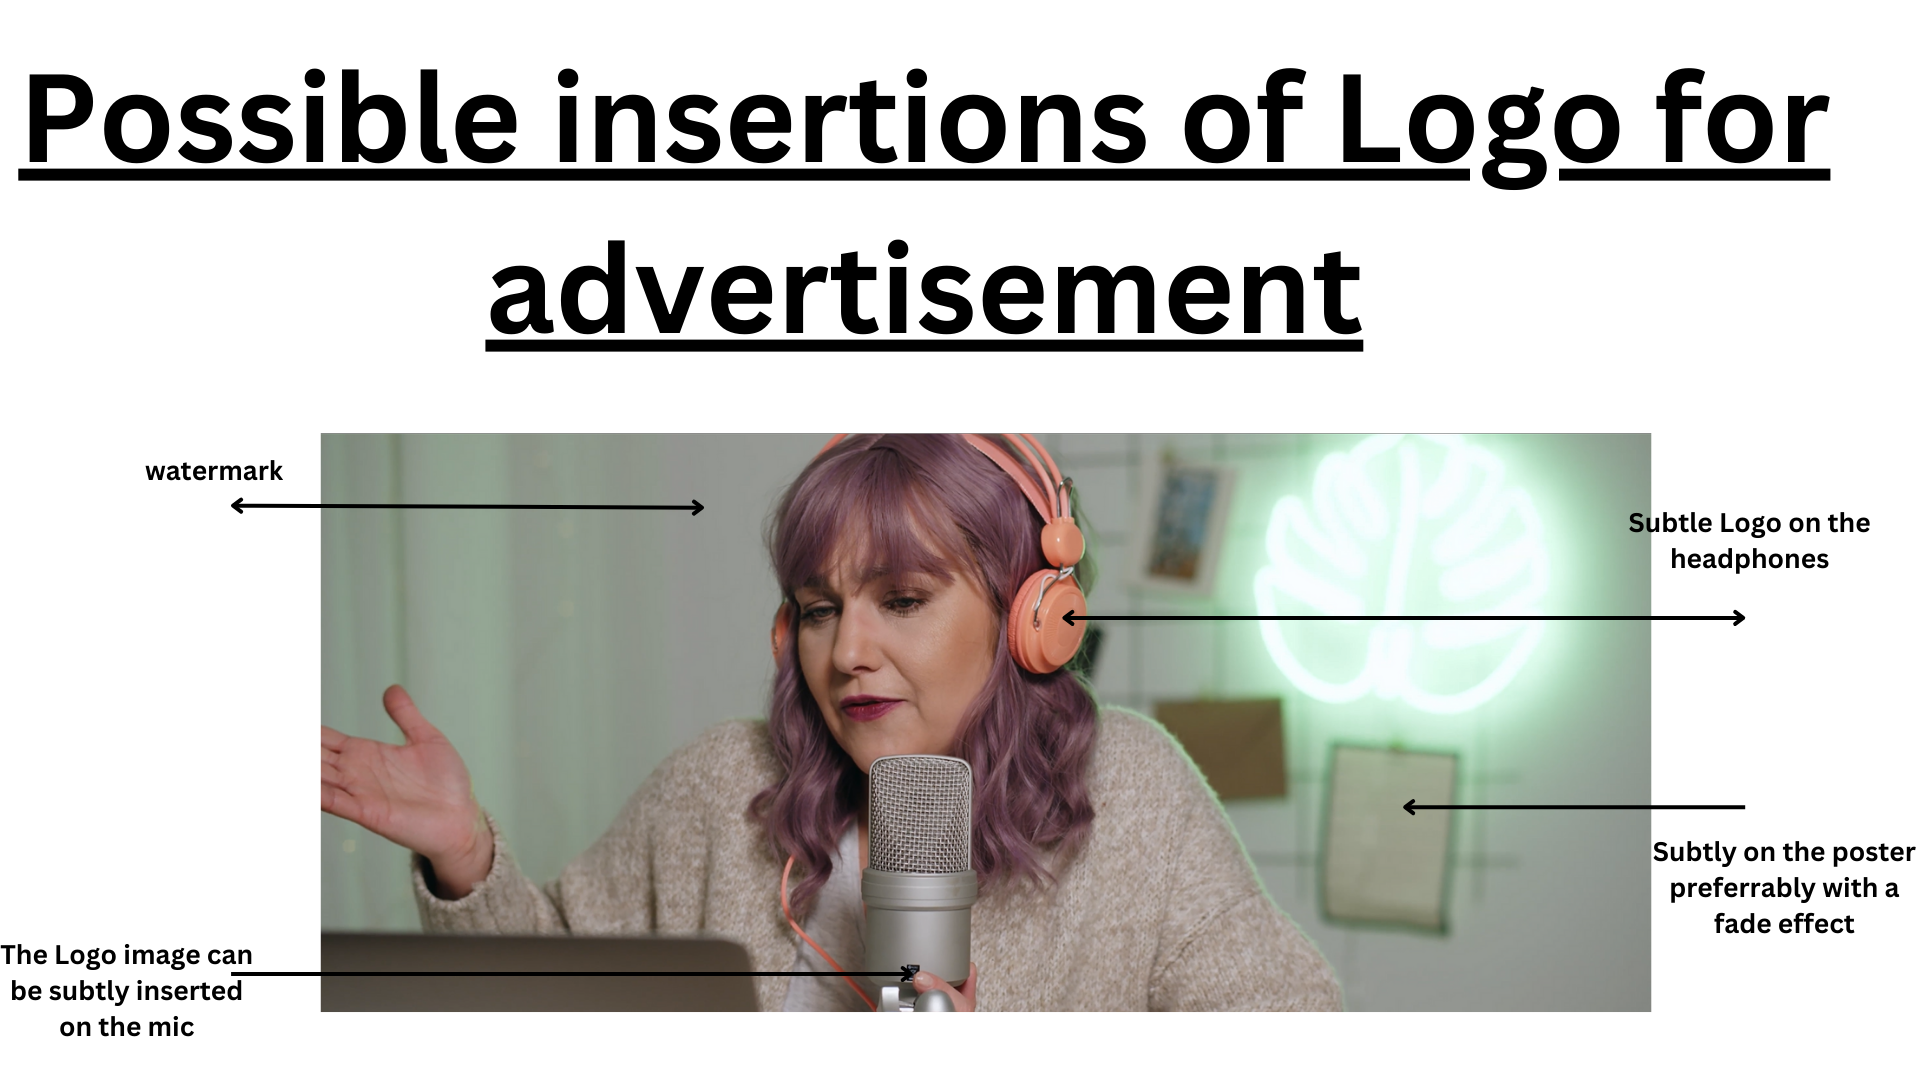

**Importing Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

*The necessary libraries imported are:*

`cv2` for computer vision tasks<br>
`numpy` for numerical computations

**Loading Necessary Files**

In [3]:
image = "Advertisement Image.jpg"
video = "Input Video 2.mp4"
foreground_path = "Advertisement Image.jpg"
foreground = cv2.imread(foreground_path)
cap = cv2.VideoCapture('Input Video 2.mp4')

1. **Loading Foreground Image:** The script attempts to load the foreground image (advertisement) specified by the file path provided. If the image is not loaded successfully, it displays an error message.
1. **Opening the Video:** It opens the specified background video file. If the video file fails to open, it shows an error message.
1. **Video Processing:**
    - **Dimensions Setup:** Retrieves original dimensions of the video and sets desired output dimensions.
    - **VideoWriter Object:** Initializes a VideoWriter object to create an output video file with the specified codec, frame rate, and dimensions.
    - **Overlaying Foreground on Background:** Iterates through each frame of the background video, resizes the foreground image, and overlays it onto the specified region of the background using ***cv2.addWeighted()*** function. The transparency (alpha) of the overlaid image is controlled by user input.
    - **Display and User Controls:** Displays the output frame and provides user controls to adjust the transparency (alpha) dynamically.
1. **Termination:** The program stops when the user presses ***'q'***, releases the video file and output video, and closes all windows.

**Extraction Of Object From Image**

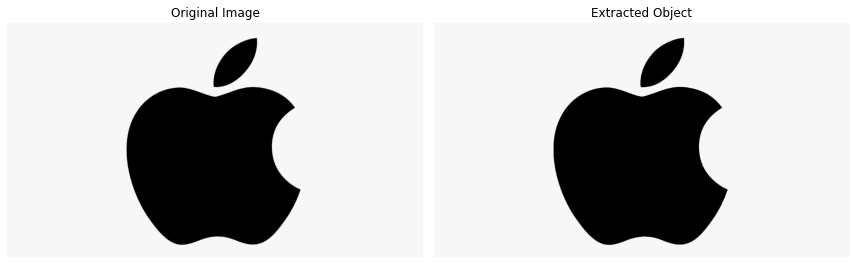

Image Resolution: Width = 1600, Height = 900, Channels = 3


In [4]:
# Load the image
image = cv2.imread(image)  # Replace with the path to your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Perform thresholding to create a binary mask (adjust threshold values as needed)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image to extract the object
extracted_object = cv2.bitwise_and(image, image, mask=thresh)

# Display the original image and the extracted object using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(extracted_object)
axes[1].set_title('Extracted Object')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Get the resolution of the image
height, width, channels = image.shape

print(f"Image Resolution: Width = {width}, Height = {height}, Channels = {channels}")

## Image Object Extraction using Thresholding
1. **Image Loading and Preprocessing**
    - **Load Image:** Reads an image file from the specified path and converts it from BGR to RGB color space using OpenCV (cv2) library.
    - **Convert to Grayscale:** Converts the loaded RGB image into a grayscale image using cv2.cvtColor().
1. **Object Extraction via Thresholding**
    - **Thresholding:** Applies a thresholding technique ***(cv2.threshold())*** to the grayscale image, creating a binary mask. Adjusting threshold values changes the mask's sensitivity to extract specific features.
    - **Applying Mask:** Utilizes ***cv2.bitwise_and()*** to apply the created binary mask to the original RGB image. This operation extracts the object from the image based on the thresholded mask.
1. **Visualization using Matplotlib**
    - **Display Images:** Utilizes Matplotlib to showcase the original image and the extracted object side by side in a single figure.
        - **Subplots:** Creates a figure with two subplots to display the original image and the extracted object.
        - **Titles and Visualization:** Sets titles for each subplot and displays images without axis ticks.
1. **Additional Information**
    - **Image Resolution:** Retrieves and prints the dimensions and channels (RGB/RGBA) of the loaded image.
1. **Note**
    - Ensure the correct file path is provided to load the image.
    - Adjust the threshold values **(cv2.threshold())** to fine-tune object extraction based on the image characteristics.


**Driver Code**

**User Controls**
- **'a':** Increase transparency (alpha) of the overlaid image by 0.1 (up to 1.0).
- **'d':** Decrease transparency (alpha) of the overlaid image by 0.1 (down to 0.0).
- **'q':** Quit the program and close all windows.

In [5]:
# Check if the foreground image is loaded successfully
if foreground is None:
    print("Error: Unable to load the foreground image.")
else:
    # Open the video file (change 'input_video2.mp4' to your video file name)
    cap = cv2.VideoCapture('Input Video 2.mp4')

    # Check if the video file is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open the video file.")
    else:
        # Get the original dimensions of the video
        original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Set the desired dimensions for the resized video
        output_width = 640  # Set your desired width
        output_height = 480  # Set your desired height

        # Create VideoWriter object to write the output video
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (output_width, output_height))

        # Set initial value of weights
        alpha = 0.4

        while True:
            # read the background
            ret, background = cap.read()

            if not ret:
                break  # Break the loop if we reach the end of the video

            background = cv2.flip(background, 1)

            # Resize the foreground image to match the dimensions of the region in the background
            foreground_resized = cv2.resize(foreground, (200, 200))

            # Select the region in the background where we want to add the image and add the images using cv2.addWeighted()
            added_image = cv2.addWeighted(
                background[original_height-300:original_height-100, original_width-300:original_width-100, :],
                alpha,
                foreground_resized,
                1 - alpha,
                0
            )

            # Change the region with the result
            background[original_height-300:original_height-100, original_width-300:original_width-100] = added_image

            # Resize the output frame to fit the desired dimensions
            output_frame = cv2.resize(background, (output_width, output_height))

            # Write the frame to the output video file
            out.write(output_frame)

            # For displaying the current value of alpha(weights)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(output_frame, 'Press "a" to increase alpha, "d" to decrease alpha, "q" to quit', (10, 30),
                        font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(output_frame, 'Current alpha: {{{{{{{{:.2f}}}}}}}}'.format(alpha), (10, 60),
                        font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('Output', output_frame)

            k = cv2.waitKey(10)  # Wait for 10 milliseconds

            # Press q to break
            if k == ord('q'):
                break

            # Press a to increase alpha by 0.1
            elif k == ord('a'):
                alpha += 0.1
                if alpha >= 1.0:
                    alpha = 1.0

            # Press d to decrease alpha by 0.1
            elif k == ord('d'):
                alpha -= 0.1
                if alpha <= 0.0:
                    alpha = 0.0

# Release the video file and destroy all windows
cap.release()
out.release()
cv2.destroyAllWindows()

# Object Tracking with SORT Library

## Purpose of the SORT Library

The SORT (Simple Online and Realtime Tracking) library is designed to facilitate object tracking in video streams. It is specifically developed for real-time applications, providing a simple yet effective algorithm for tracking multiple objects in consecutive frames of a video. The primary purpose of the SORT library is to assign unique identifiers to objects in a video, enabling the tracking of their movements over time.

## Significance in Object Tracking

### 1. **Data Association:**
   SORT excels in data association, which is crucial for linking object detections across frames. It employs a combination of the Hungarian algorithm and Kalman filtering to associate object detections with existing tracks, ensuring a consistent and accurate tracking process.

### 2. **Real-time Tracking:**
   The SORT library is optimized for real-time applications, making it suitable for scenarios where low-latency tracking is essential. Its efficient implementation allows for effective tracking even in situations with a large number of objects.

### 3. **Handling Occlusions:**
   Occlusions occur when objects temporarily block each other in the field of view. SORT incorporates mechanisms to handle occlusions, maintaining the continuity of tracks when objects reappear after being temporarily obscured.

In object tracking applications, especially those dealing with real-time video streams and challenging scenarios like occlusions, the SORT library plays a significant role. Its efficient data association techniques and adaptability make it a valuable tool for developers and researchers working on object tracking solutions.




## Hand Tracking in Python with Occlusion Handling<br>
<br>
Hand tracking with occlusion handling involves dealing with scenarios where a hand may be partially or fully hidden behind objects. This is crucial for applications like augmented reality or human-computer interaction, where accurately tracking<br> the hand even in occluded situations is essential.<br>

**Application Of The Cascade library for graceful Occlusion handling**

In [ ]:
def detect_hand(video_path, output_path, base_hand_level=0.3, image_scale=0.7):
   
    hand_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_hand.xml')

    
    top_left_y = 600
    top_left_x = 120

    # Get video properties
    video = cv2.VideoCapture(video_path)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv2.CAP_PROP_FPS)

    # Define VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = video.read()

        if not ret:
            break

        # Convert the frame to grayscale for hand detection
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect hands using the cascade classifier
        hands = hand_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(hands) > 0:
            # Assuming only one hand is detected, take the first hand
            x, y, w, h = hands[0]

            # Check if the hand is above a certain level
            if y < base_hand_level * height:
                # Move the image when the hand is above the specified level
                top_left_y = max(0, y - int(image_scale * height))

            
            resized_image = cv2.resize(image, (int(image_scale * w), int(image_scale * h)))

            
            alpha_channel = cv2.resize(resized_image[:, :, 3], (resized_image.shape[1], resized_image.shape[0])) / 255.0
            frame[top_left_y:top_left_y + resized_image.shape[0], top_left_x:top_left_x + resized_image.shape[1]] = (
                    (1 - alpha_channel)[:, :, np.newaxis] * frame[top_left_y:top_left_y + resized_image.shape[0], top_left_x:top_left_x + resized_image.shape[1]]
                    + alpha_channel[:, :, np.newaxis] * resized_image[:, :, :3]
            )

        out_writer.write(frame)

        cv2.imshow('Processed Image', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    video.release()
    out_writer.release()
    cv2.destroyAllWindows()

video_path = "Input Video 2.mp4"
output_path = "output_video_with_logo.mp4"

detect_hand(video_path, output_path)
